In [1012]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

#### 关闭异常警告

In [1013]:
pd.set_option('mode.chained_assignment', None)

##### 原始数据导入

In [1014]:
g_finance = pd.read_excel('./2020年原始数据.xlsx')

## 一、关键指标计算
### 2
##### 2.5计算20年企业单位营业收入能耗

In [1015]:
g_finance.drop(g_finance[g_finance['rdl_202012']==0].index,inplace=True)

In [1016]:
g_finance['企业单位营业收入能耗'] = g_finance['2020电量']/g_finance['20营业总收入（万元）']

In [1017]:
def cal_ube(rdl):
    result = round(g_finance[rdl]/(g_finance['20营业总收入（万元）']/12),2)
    return result

In [1018]:
g_finance['企业单位营业收入能耗'] = cal_ube('rdl_202012')

##### 2.6计算20年企业单位税收能耗

In [1019]:
g_finance['企业单位税收能耗'] = g_finance['2020电量']/g_finance['20税收总额（万元）']

In [1020]:
def cal_ute(rdl):
    result = round(g_finance[rdl]/(g_finance['20税收总额（万元）']/12),2)
    return result

In [1021]:
g_finance['企业单位税收能耗'] = cal_ute('rdl_202012')

##### 2.7计算20年企业单位利润能耗

In [1022]:
g_finance['企业单位利润能耗'] = g_finance['2020电量']/g_finance['20利润总额（万元）']

In [1023]:
def cal_upe(rdl):
    result = round(g_finance[rdl]/(g_finance['20利润总额（万元）']/12),2)
    return result

In [1024]:
g_finance['企业单位利润能耗'] = cal_upe('rdl_202012')

##### 2.8
##### 先根据行业进行分组

In [1025]:
trade = g_finance.groupby('制造业大类分类')

##### 计算20年每个行业对应的单位税收能耗

In [1026]:
g_trade = trade['2020电量'].sum()/trade['20税收总额（万元）'].sum()

##### 计算20年企业单位税收能耗在其所在行业所处的等级

In [1027]:
g_finance['企业单位税收能耗等级'] = g_finance['企业单位税收能耗'].values/g_trade[g_finance['制造业大类分类']].values

##### 计算20年每个月企业单位税收能耗在其所在行业所处的等级

In [1028]:
def cal_ute_level(rdl):
    m_trade = trade[rdl].sum()/(trade['20税收总额（万元）'].sum()/12)
    result = round((g_finance[rdl]/(g_finance['20税收总额（万元）']/12).values)/m_trade[g_finance['制造业大类分类']].values,2)
    return result

In [1029]:
g_finance['企业单位税收能耗等级'] = cal_ute_level('rdl_202012')

### 3
##### 用于计算企业单位税收能耗的同比数据的函数，参数tyd代表当月的能耗值，lyd代表上一年度同月份的能耗值
##### 该函数用于计算2020年与2019年的同比数据，如果需要修改年份，需调整函数内容

In [1030]:
def cal_ute_yoy(tyd,lyd):
    result = (g_finance[tyd]/(g_finance['20税收总额（万元）']/12)-g_finance[lyd]/(g_finance['19税收总额（万元）']/12))/(g_finance[lyd]/(g_finance['19税收总额（万元）']/12))
    return result

##### 计算2020年1-12月份每个月的企业单位税收能耗同比增长率

In [1031]:
g_finance['ute_yoy_202001'] = cal_ute_yoy('rdl_202001','rdl_201901')
g_finance['ute_yoy_202002'] = cal_ute_yoy('rdl_202002','rdl_201902')
g_finance['ute_yoy_202003'] = cal_ute_yoy('rdl_202003','rdl_201903')
g_finance['ute_yoy_202004'] = cal_ute_yoy('rdl_202004','rdl_201904')
g_finance['ute_yoy_202005'] = cal_ute_yoy('rdl_202005','rdl_201905')
g_finance['ute_yoy_202006'] = cal_ute_yoy('rdl_202006','rdl_201906')
g_finance['ute_yoy_202007'] = cal_ute_yoy('rdl_202007','rdl_201907')
g_finance['ute_yoy_202008'] = cal_ute_yoy('rdl_202008','rdl_201908')
g_finance['ute_yoy_202009'] = cal_ute_yoy('rdl_202009','rdl_201909')
g_finance['ute_yoy_202010'] = cal_ute_yoy('rdl_202010','rdl_201910')
g_finance['ute_yoy_202011'] = cal_ute_yoy('rdl_202011','rdl_201911')
g_finance['ute_yoy_202012'] = cal_ute_yoy('rdl_202012','rdl_201912')

##### 创建提取字段用的列表

In [1032]:
ute_yoy_1to12 = ['ute_yoy_202001','ute_yoy_202002','ute_yoy_202003','ute_yoy_202004','ute_yoy_202005','ute_yoy_202006','ute_yoy_202007','ute_yoy_202008','ute_yoy_202009','ute_yoy_202010','ute_yoy_202011','ute_yoy_202012']

##### 3.9计算2020年企业单位税收能耗月度同比增长率下降次数

In [1033]:
g_finance['最近12个月内企业单位税收能耗月度同比增长率下降次数'] = g_finance[g_finance[ute_yoy_1to12]<0].count(axis=1)

##### 3.10计算2020年企业单位税收能耗月度同比增长率算术平均值

In [1034]:
g_finance['最近12个月内企业单位税收能耗月度同比增长率算术平均值'] = round(g_finance[ute_yoy_1to12].apply(lambda x: x.sum(),axis=1)/12,2)

##### 创建提取字段用的列表

In [1035]:
ute_yoy_1to12_wk = ['制造业大类分类','ute_yoy_202001','ute_yoy_202002','ute_yoy_202003','ute_yoy_202004','ute_yoy_202005','ute_yoy_202006','ute_yoy_202007','ute_yoy_202008','ute_yoy_202009','ute_yoy_202010','ute_yoy_202011','ute_yoy_202012']

##### 生成以行业类别为索引,该行业1至12月份同比增长率的平均值为数据的二维数组

In [1036]:
g_trade_p = g_finance[ute_yoy_1to12_wk].groupby('制造业大类分类').mean()

##### 提取行业类别+企业1至12月份同比增长率数据

In [1037]:
gfu = g_finance[ute_yoy_1to12_wk]

##### 将以上数据的行业类别设置为索引

In [1038]:
gfu_new = gfu.set_index('制造业大类分类')

##### 计算企业单位税收能耗与行业平均税收能耗的差值

In [1039]:
gfu_diff = gfu_new - g_trade_p.loc[g_finance['制造业大类分类']]

##### 3.11差值小于0的代表企业单位税收能耗月度同比增长率较行业平均增长率是下降的

In [1040]:
g_finance['最近12个月内企业单位税收能耗月度同比增长率较行业平均增长率的下降次数'] = gfu_diff[gfu_diff[ute_yoy_1to12]<0].count(axis=1).values

### 4
##### 4.12计算2020年1-12月份企业单位税收能耗月度同比增长率方差

In [1041]:
g_finance['最近12个月内企业单位税收能耗月度同比增长率方差'] = g_finance[ute_yoy_1to12].var(axis=1)

##### 用于计算企业单位税收能耗的环比数据的函数，参数tmd代表当月的能耗值，lmd代表上个月的能耗值
##### 该函数用于计算2020年内同比数据，1月份没有参照月，所以不计算在内

In [1042]:
def cal_ute_mom(tmd,lmd):
    result = (g_finance[tmd]-g_finance[lmd])/g_finance[lmd]
    return result

##### 计算2020年企业单位税收能耗月度环比增长率

In [1043]:
g_finance['ute_202001_02'] = cal_ute_mom('rdl_202002','rdl_202001')
g_finance['ute_202002_03'] = cal_ute_mom('rdl_202003','rdl_202002')
g_finance['ute_202003_04'] = cal_ute_mom('rdl_202004','rdl_202003')
g_finance['ute_202004_05'] = cal_ute_mom('rdl_202005','rdl_202004')
g_finance['ute_202005_06'] = cal_ute_mom('rdl_202006','rdl_202005')
g_finance['ute_202006_07'] = cal_ute_mom('rdl_202007','rdl_202006')
g_finance['ute_202007_08'] = cal_ute_mom('rdl_202008','rdl_202007')
g_finance['ute_202008_09'] = cal_ute_mom('rdl_202009','rdl_202008')
g_finance['ute_202009_10'] = cal_ute_mom('rdl_202010','rdl_202009')
g_finance['ute_202010_11'] = cal_ute_mom('rdl_202011','rdl_202010')
g_finance['ute_202011_12'] = cal_ute_mom('rdl_202012','rdl_202011')

##### 创建列表用于获取1-12月份企业单位税收能耗环比增长率字段

In [1044]:
ute_mom_1to12 = ['ute_202001_02','ute_202002_03','ute_202003_04','ute_202004_05','ute_202005_06','ute_202006_07','ute_202007_08','ute_202008_09','ute_202009_10','ute_202010_11','ute_202011_12']

##### 4.13计算2020年企业单位税收能耗月度环比增长率方差

In [1045]:
g_finance['最近12个月内企业单位税收能耗月度环比增长率方差'] = g_finance[ute_mom_1to12].var(axis=1)

##### 计算2020年4季度企业单位税收能耗环比增长率

In [1046]:
g_finance['2020年四季度环比增长率'] = ((g_finance['rdl_202010']+g_finance['rdl_202011']+g_finance['rdl_202012'])-(g_finance['rdl_202007']+g_finance['rdl_202008']+g_finance['rdl_202009']))/(g_finance['rdl_202007']+g_finance['rdl_202008']+g_finance['rdl_202009'])

##### 计算2020年3季度企业单位税收能耗环比增长率

In [1047]:
g_finance['2020年三季度环比增长率'] = ((g_finance['rdl_202007']+g_finance['rdl_202008']+g_finance['rdl_202009'])-(g_finance['rdl_202004']+g_finance['rdl_202005']+g_finance['rdl_202006']))/(g_finance['rdl_202004']+g_finance['rdl_202005']+g_finance['rdl_202006'])

##### 4.14计算2020年4季度企业单位税收能耗季度环比增长率偏离度

In [1048]:
g_finance['最近一季度企业单位税收能耗季度环比增长率偏离度'] = round((g_finance['2020年四季度环比增长率']-g_finance['2020年三季度环比增长率'])/g_finance['2020年三季度环比增长率'],2)

##### 4.15计算2020年12月份企业单位税收能耗环比增长率偏离度

In [1049]:
g_finance['最近1个月企业单位税收能耗环比增长率偏离度'] = round((g_finance['ute_202011_12']-g_finance['ute_202010_11'])/g_finance['ute_202010_11'],2)

##### 根据行业分组计算2020年12月份的行业单位税收能耗

In [1050]:
g_trade_202012 = trade['rdl_202012'].sum()/(trade['20税收总额（万元）'].sum()/12)

##### 4.16计算2020年12月份企业单位税收能耗与行业单位税收能耗的偏离值

In [1051]:
g_finance['最近1个月企业单位税收能耗行业偏离度'] = round((g_finance['rdl_202012']/(g_finance['20税收总额（万元）']/12)-g_trade_202012[g_finance['制造业大类分类']].values)/g_trade_202012[g_finance['制造业大类分类']].values,2)

In [1052]:
g_finance[['qymc','企业单位营业收入能耗','企业单位税收能耗','企业单位利润能耗','企业单位税收能耗等级','最近12个月内企业单位税收能耗月度同比增长率下降次数','最近12个月内企业单位税收能耗月度同比增长率算术平均值','最近12个月内企业单位税收能耗月度同比增长率较行业平均增长率的下降次数','最近12个月内企业单位税收能耗月度同比增长率方差','最近12个月内企业单位税收能耗月度环比增长率方差','最近一季度企业单位税收能耗季度环比增长率偏离度','最近1个月企业单位税收能耗环比增长率偏离度','最近1个月企业单位税收能耗行业偏离度']].to_excel('./计算结果集.xlsx')

## 二、评价

In [1053]:
appraise = g_finance[['qymc','制造业大类分类','地区','企业单位营业收入能耗','企业单位税收能耗','企业单位利润能耗','企业单位税收能耗等级','最近12个月内企业单位税收能耗月度同比增长率下降次数','最近12个月内企业单位税收能耗月度同比增长率算术平均值','最近12个月内企业单位税收能耗月度同比增长率较行业平均增长率的下降次数','最近12个月内企业单位税收能耗月度同比增长率方差','最近12个月内企业单位税收能耗月度环比增长率方差','最近一季度企业单位税收能耗季度环比增长率偏离度','最近1个月企业单位税收能耗环比增长率偏离度','最近1个月企业单位税收能耗行业偏离度']]

##### 标准化函数

In [1054]:
def cal_appraise(target):
    result = (appraise[target]-appraise[target].min())/(appraise[target].max()-appraise[target].min())
    return result

##### 计算企业单位营业收入能耗评分

In [1055]:
appraise.drop(appraise[appraise['企业单位营业收入能耗']==0].index,inplace=True)

mad5 = appraise['企业单位营业收入能耗'].mad()

appraise.loc[appraise['企业单位营业收入能耗']>mad5,'企业单位营业收入能耗'] = \
appraise.loc[appraise['企业单位营业收入能耗']<mad5,'企业单位营业收入能耗'].max()

appraise['企业单位营业收入能耗标准化'] = cal_appraise('企业单位营业收入能耗')

appraise['企业单位营业收入能耗得分'] = (0.1**(appraise['企业单位营业收入能耗标准化']))*100

##### 计算企业单位税收能耗评分

In [1056]:
appraise.drop(appraise[appraise['企业单位税收能耗']==0].index,inplace=True)

mad6 = appraise['企业单位税收能耗'].mad()

appraise.loc[appraise['企业单位税收能耗']>mad6,'企业单位税收能耗'] = \
appraise.loc[appraise['企业单位税收能耗']<mad6,'企业单位税收能耗'].max()

appraise['企业单位税收能耗标准化'] = cal_appraise('企业单位税收能耗')

appraise['企业单位税收能耗得分'] = (0.1**(appraise['企业单位税收能耗标准化']))*100

##### 计算企业单位利润能耗评分

In [1057]:
mad7 = appraise['企业单位利润能耗'].mad()

appraise.loc[(appraise['企业单位利润能耗']>mad7) | (appraise['企业单位利润能耗']<0),'企业单位利润能耗'] = \
appraise.loc[appraise['企业单位利润能耗']<mad7,'企业单位利润能耗'].max()

appraise['企业单位利润能耗标准化'] = cal_appraise('企业单位利润能耗')

appraise['企业单位利润能耗得分'] = 0.1**appraise['企业单位利润能耗标准化']*100

##### 计算企业单位税收能耗等级评分

In [1058]:
appraise['企业单位税收能耗等级得分'] = (pd.cut(appraise['企业单位税收能耗等级'],bins=[-1,0.4,0.8,1,2,100000000],labels=['100','80','60','40','20'])).astype('int32')

##### 计算最近12个月内企业单位税收能耗月度同比增长率下降次数评分

In [1059]:
appraise['最近12个月内企业单位税收能耗月度同比增长率下降次数得分'] = (pd.cut(appraise['最近12个月内企业单位税收能耗月度同比增长率下降次数'],bins=[-1,2,4,6,8,10,12],labels=['0','20','40','60','80','100'])).astype('int32')

##### 计算最近12个月内企业单位税收能耗月度同比增长率算术平均值评分

In [1060]:
mad10 = appraise['最近12个月内企业单位税收能耗月度同比增长率算术平均值'].mad()

appraise.loc[appraise['最近12个月内企业单位税收能耗月度同比增长率算术平均值']>mad10,'最近12个月内企业单位税收能耗月度同比增长率算术平均值'] = \
appraise.loc[appraise['最近12个月内企业单位税收能耗月度同比增长率算术平均值']<mad10,'最近12个月内企业单位税收能耗月度同比增长率算术平均值'].max()

appraise['最近12个月内企业单位税收能耗月度同比增长率算术平均值标准化'] = cal_appraise('最近12个月内企业单位税收能耗月度同比增长率算术平均值')

appraise['最近12个月内企业单位税收能耗月度同比增长率算术平均值得分'] = 0.1**appraise['最近12个月内企业单位税收能耗月度同比增长率算术平均值标准化']*100

##### 计算最近12个月内企业单位税收能耗月度同比增长率较行业平均增长率的下降次数评分

In [1061]:
appraise['最近12个月内企业单位税收能耗月度同比增长率较行业平均增长率的下降次数得分'] = (pd.cut(appraise['最近12个月内企业单位税收能耗月度同比增长率较行业平均增长率的下降次数'],bins=[-1,2,4,6,8,10,12],labels=['0','20','40','60','80','100'])).astype('int32')

##### 计算最近12个月内企业单位税收能耗月度同比增长率方差评分

In [1062]:
mad12 = appraise['最近12个月内企业单位税收能耗月度同比增长率方差'].median()

appraise.loc[appraise['最近12个月内企业单位税收能耗月度同比增长率方差']>mad12,'最近12个月内企业单位税收能耗月度同比增长率方差'] = \
appraise.loc[appraise['最近12个月内企业单位税收能耗月度同比增长率方差']<mad12,'最近12个月内企业单位税收能耗月度同比增长率方差'].max()

appraise['最近12个月内企业单位税收能耗月度同比增长率方差标准化'] = cal_appraise('最近12个月内企业单位税收能耗月度同比增长率方差')

appraise['最近12个月内企业单位税收能耗月度同比增长率方差得分'] = 0.1**appraise['最近12个月内企业单位税收能耗月度同比增长率方差标准化']*100

##### 计算最近12个月内企业单位税收能耗月度环比增长率方差评分

In [1063]:
mad13 = appraise['最近12个月内企业单位税收能耗月度环比增长率方差'].median()

appraise.loc[appraise['最近12个月内企业单位税收能耗月度环比增长率方差']>mad13,'最近12个月内企业单位税收能耗月度环比增长率方差'] = \
appraise.loc[appraise['最近12个月内企业单位税收能耗月度环比增长率方差']<mad13,'最近12个月内企业单位税收能耗月度环比增长率方差'].max()

appraise['最近12个月内企业单位税收能耗月度环比增长率方差标准化'] = cal_appraise('最近12个月内企业单位税收能耗月度环比增长率方差')

appraise['最近12个月内企业单位税收能耗月度环比增长率方差得分'] = 0.1**appraise['最近12个月内企业单位税收能耗月度环比增长率方差标准化']*100

##### 计算最近一季度企业单位税收能耗季度环比增长率偏离度评分

In [1064]:
mad14 = appraise['最近一季度企业单位税收能耗季度环比增长率偏离度'].mad()

appraise.loc[appraise['最近一季度企业单位税收能耗季度环比增长率偏离度']>mad14,'最近一季度企业单位税收能耗季度环比增长率偏离度'] = \
appraise.loc[appraise['最近一季度企业单位税收能耗季度环比增长率偏离度']<mad14,'最近一季度企业单位税收能耗季度环比增长率偏离度'].max()

appraise.loc[appraise['最近一季度企业单位税收能耗季度环比增长率偏离度']<-mad14,'最近一季度企业单位税收能耗季度环比增长率偏离度'] = \
appraise.loc[appraise['最近一季度企业单位税收能耗季度环比增长率偏离度']>-mad14,'最近一季度企业单位税收能耗季度环比增长率偏离度'].min()

appraise['最近一季度企业单位税收能耗季度环比增长率偏离度标准化'] = cal_appraise('最近一季度企业单位税收能耗季度环比增长率偏离度')

appraise['最近一季度企业单位税收能耗季度环比增长率偏离度得分'] = 0.1**appraise['最近一季度企业单位税收能耗季度环比增长率偏离度标准化']*100

##### 计算最近1个月企业单位税收能耗环比增长率偏离度评分

In [1065]:
mad15 = appraise['最近1个月企业单位税收能耗环比增长率偏离度'].mad()

appraise.loc[appraise['最近1个月企业单位税收能耗环比增长率偏离度']>mad15,'最近1个月企业单位税收能耗环比增长率偏离度'] = \
appraise.loc[appraise['最近1个月企业单位税收能耗环比增长率偏离度']<mad15,'最近1个月企业单位税收能耗环比增长率偏离度'].max()

appraise.loc[appraise['最近1个月企业单位税收能耗环比增长率偏离度']<-mad15,'最近1个月企业单位税收能耗环比增长率偏离度'] = \
appraise.loc[appraise['最近1个月企业单位税收能耗环比增长率偏离度']>-mad15,'最近1个月企业单位税收能耗环比增长率偏离度'].min()

appraise['最近1个月企业单位税收能耗环比增长率偏离度标准化'] = cal_appraise('最近1个月企业单位税收能耗环比增长率偏离度')

appraise['最近1个月企业单位税收能耗环比增长率偏离度得分'] = 0.1**appraise['最近1个月企业单位税收能耗环比增长率偏离度标准化']*100

##### 计算最近1个月企业单位税收能耗行业偏离度评分

In [1066]:
mad16 = appraise['最近1个月企业单位税收能耗行业偏离度'].mean()

appraise.loc[appraise['最近1个月企业单位税收能耗行业偏离度']>mad16,'最近1个月企业单位税收能耗行业偏离度'] = \
appraise.loc[appraise['最近1个月企业单位税收能耗行业偏离度']<mad16,'最近1个月企业单位税收能耗行业偏离度'].max()

appraise['最近1个月企业单位税收能耗行业偏离度标准化'] = cal_appraise('最近1个月企业单位税收能耗行业偏离度')

appraise['最近1个月企业单位税收能耗行业偏离度得分'] = 0.1**appraise['最近1个月企业单位税收能耗行业偏离度标准化']*100

In [1067]:
appraise['企业能耗强度评价得分'] = appraise['企业单位营业收入能耗得分']*0.167 + appraise['企业单位税收能耗得分']*0.167 + appraise['企业单位利润能耗得分']*0.167+appraise['企业单位税收能耗等级得分']*0.5
appraise['企业能耗趋势性评价得分'] = appraise['最近12个月内企业单位税收能耗月度同比增长率下降次数得分']*0.333 + appraise['最近12个月内企业单位税收能耗月度同比增长率算术平均值得分']*0.333 + appraise['最近12个月内企业单位税收能耗月度同比增长率较行业平均增长率的下降次数得分']*0.333
appraise['企业能耗稳定性评价得分'] = appraise['最近12个月内企业单位税收能耗月度同比增长率方差得分']*0.2 + appraise['最近12个月内企业单位税收能耗月度环比增长率方差得分']*0.2 + appraise['最近一季度企业单位税收能耗季度环比增长率偏离度得分']*0.2 + appraise['最近1个月企业单位税收能耗环比增长率偏离度得分']*0.2 + appraise['最近1个月企业单位税收能耗行业偏离度得分']*0.2

In [1068]:
appraise['企业能耗评价总分'] = appraise['企业能耗强度评价得分']*0.5 + appraise['企业能耗趋势性评价得分']*0.25 + appraise['企业能耗稳定性评价得分']*0.25

<AxesSubplot:>

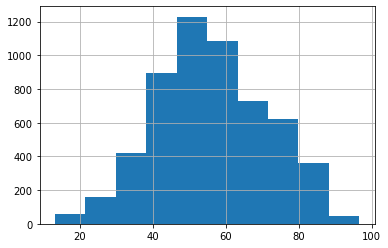

In [1069]:
appraise['企业能耗评价总分'].hist()

In [1070]:
appraise[['qymc','制造业大类分类','企业单位营业收入能耗得分','企业单位税收能耗得分','企业单位利润能耗得分','企业单位税收能耗等级得分','最近12个月内企业单位税收能耗月度同比增长率下降次数得分','最近12个月内企业单位税收能耗月度同比增长率算术平均值得分','最近12个月内企业单位税收能耗月度同比增长率较行业平均增长率的下降次数得分','最近12个月内企业单位税收能耗月度同比增长率方差得分','最近12个月内企业单位税收能耗月度环比增长率方差得分','最近一季度企业单位税收能耗季度环比增长率偏离度得分','最近1个月企业单位税收能耗环比增长率偏离度得分','最近1个月企业单位税收能耗行业偏离度得分','企业能耗强度评价得分','企业能耗趋势性评价得分','企业能耗稳定性评价得分','企业能耗评价总分','地区']].to_excel('./评分结果集.xlsx')